In [1]:
import pandas as pd 
import sys
import os
sys.path.append(os.path.abspath(r'C:\Users\Yibabe\Desktop\kifiyaAIMweek-2\scripts'))
from task1_2_connection import load_data_from_postgres


In [2]:
# Define the query to fetch data from the 'cleaned_data' table
query = "SELECT * FROM cleaned_data"

# Load the data into a DataFrame
df_cleaned = load_data_from_postgres(query)

# Display the first few rows of the DataFrame to verify
df_cleaned.head()

C:\Users\Yibabe\Desktop\kifiyaAIMweek-2\scripts\task1_2_connection.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Dur. (ms),Start,End,IMSI,MSISDN/Number,Email DL (Bytes),Gaming DL (Bytes),Google DL (Bytes),Avg RTT DL (ms),Avg Bearer TP DL (kbps),...,HTTP DL (Bytes),HTTP UL (Bytes),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Handset Type,Handset Manufacturer,Bearer Id
0,951292.0,4/14/2019 2:11,4/25/2019 2:26,2.082010e+14,33763490140.0,2987408.0,748906189.0,1304524.0,39.0,3698.0,...,230583.0,25427.0,775350343.0,58813016.0,3103940.0,12189786.0,6858496.0,undefined,undefined,1.304243e+19
1,941634.0,4/14/2019 12:48,4/25/2019 10:22,2.082014e+14,33698743617.0,3014208.0,801543830.5,7560820.0,45.0,46.0,...,0.0,0.0,861612261.0,42363146.0,342043.0,18436641.0,10587264.0,Samsung Galaxy A8 (2018),Samsung,1.311448e+19
2,864482.0,4/15/2019 0:32,4/25/2019 0:40,2.082003e+14,33659219748.0,522457.0,801543830.5,8601949.0,97.0,3845.0,...,132246.0,32449.0,850570347.0,22417975.0,1541259.0,16338345.0,12211149.0,Samsung Galaxy Note 8 (Sm-N950F Ds),Samsung,1.304243e+19
3,848637.0,4/15/2019 10:30,4/25/2019 6:14,2.082098e+14,33665646348.0,3095404.0,565283082.0,4366381.0,45.0,6.0,...,0.0,0.0,594967693.0,56559490.0,2653333.0,2595678.0,16973815.0,undefined,undefined,7.277826e+18
4,889834.0,4/15/2019 11:33,4/25/2019 18:44,2.082019e+14,33664473872.0,1541381.0,504604946.0,7241855.0,217.0,28305.0,...,35986300.0,689004.0,535118044.0,33691738.0,829305.0,2805710.0,18094847.0,Huawei B593S-22,Huawei,1.311448e+19


In [3]:
# Calculate total session duration and total data per user
df_cleaned['Total Data (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']
df_cleaned['Total Duration'] = df_cleaned['Dur. (ms)']

# Segment users into deciles based on total duration
df_cleaned['Decile'] = pd.qcut(df_cleaned['Total Duration'], 5, labels=False)

# Compute total data (DL+UL) per decile class
decile_data = df_cleaned.groupby('Decile')['Total Data (Bytes)'].sum().reset_index()

print(decile_data)


   Decile  Total Data (Bytes)
0       0        1.478004e+13
1       1        2.328185e+13
2       2        6.239782e+12
3       3        1.474665e+13
4       4        1.482287e+13


In [4]:
# Compute basic statistics for key variables
basic_metrics = df_cleaned[['Total Duration', 'Total Data (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].describe()

print(basic_metrics)


       Total Duration  Total Data (Bytes)  Total DL (Bytes)  Total UL (Bytes)
count    1.489920e+05        1.489920e+05      1.489920e+05      1.489920e+05
mean     1.049138e+05        4.958064e+08      4.546843e+08      4.112219e+07
std      8.063743e+04        2.444053e+08      2.441679e+08      1.127745e+07
min      7.142000e+03        2.895611e+07      7.114041e+06      2.866892e+06
25%      5.800775e+04        2.845405e+08      2.431624e+08      3.322098e+07
50%      8.639900e+04        4.969529e+08      4.559841e+08      4.114406e+07
75%      1.327815e+05        7.065965e+08      6.657570e+08      4.903433e+07
max      1.859336e+06        9.559848e+08      9.029696e+08      7.833131e+07


In [5]:
# Calculate dispersion parameters
dispersion_metrics = df_cleaned[['Total Duration', 'Total Data (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].agg(['var', 'std', 'min', 'max'])

print(dispersion_metrics)


     Total Duration  Total Data (Bytes)  Total DL (Bytes)  Total UL (Bytes)
var    6.502395e+09        5.973395e+16      5.961798e+16      1.271809e+14
std    8.063743e+04        2.444053e+08      2.441679e+08      1.127745e+07
min    7.142000e+03        2.895611e+07      7.114041e+06      2.866892e+06
max    1.859336e+06        9.559848e+08      9.029696e+08      7.833131e+07


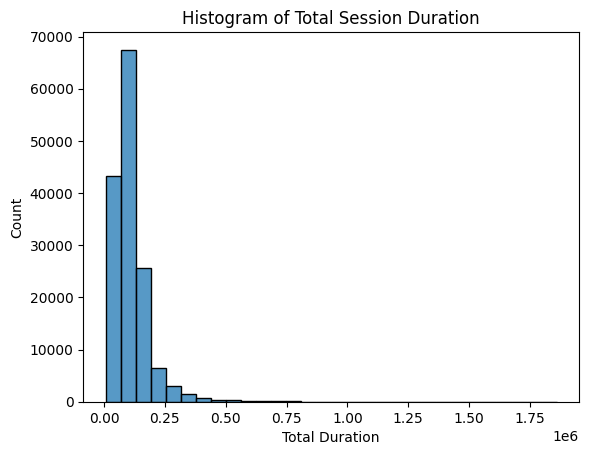

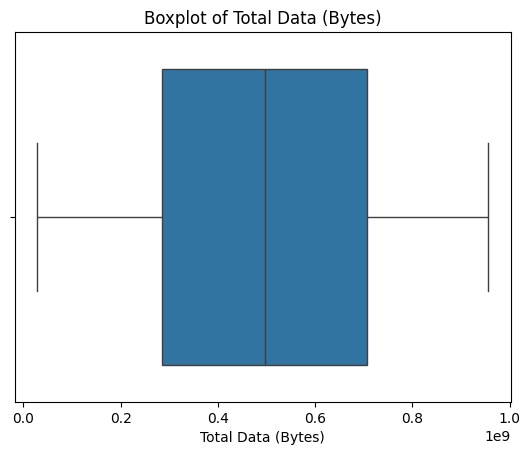

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for total duration
sns.histplot(df_cleaned['Total Duration'], bins=30)
plt.title('Histogram of Total Session Duration')
plt.show()

# Boxplot for Total Data (Bytes)
sns.boxplot(x=df_cleaned['Total Data (Bytes)'])
plt.title('Boxplot of Total Data (Bytes)')
plt.show()


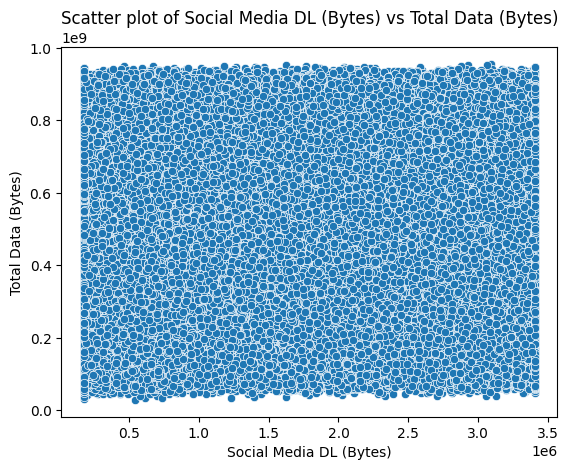

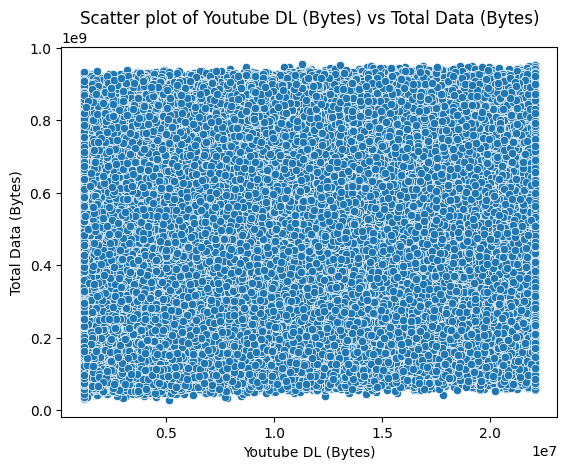

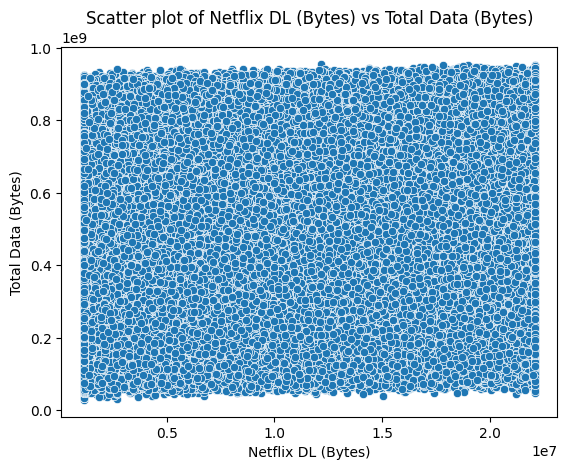

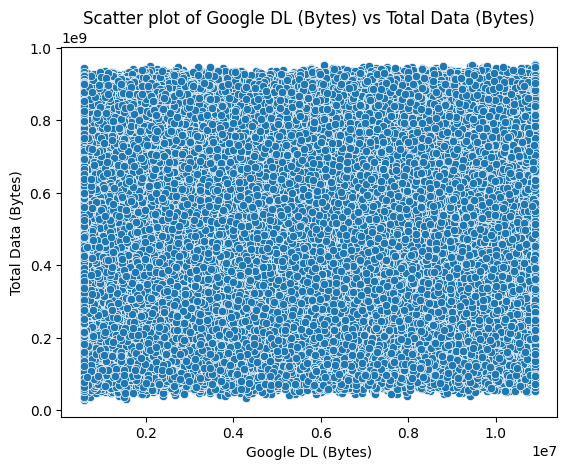

In [7]:
# Create scatter plots for each application data vs total data
applications = ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Google DL (Bytes)']

for app in applications:
    sns.scatterplot(x=df_cleaned[app], y=df_cleaned['Total Data (Bytes)'])
    plt.title(f'Scatter plot of {app} vs Total Data (Bytes)')
    plt.show()


                         Social Media DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           -0.001363   
Youtube DL (Bytes)                     -0.001363            1.000000   
Netflix DL (Bytes)                     -0.001428            0.001003   
Google DL (Bytes)                      -0.002301            0.001891   
Email DL (Bytes)                        0.005058            0.002040   
Gaming DL (Bytes)                       0.001168           -0.002117   
Other DL (Bytes)                        0.005889            0.001809   

                         Netflix DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)           -0.001428          -0.002301   
Youtube DL (Bytes)                 0.001003           0.001891   
Netflix DL (Bytes)                 1.000000           0.000744   
Google DL (Bytes)                  0.000744           1.000000   
Email DL (Bytes)                   0.001621          -0.000072   
Gaming DL (Bytes)          

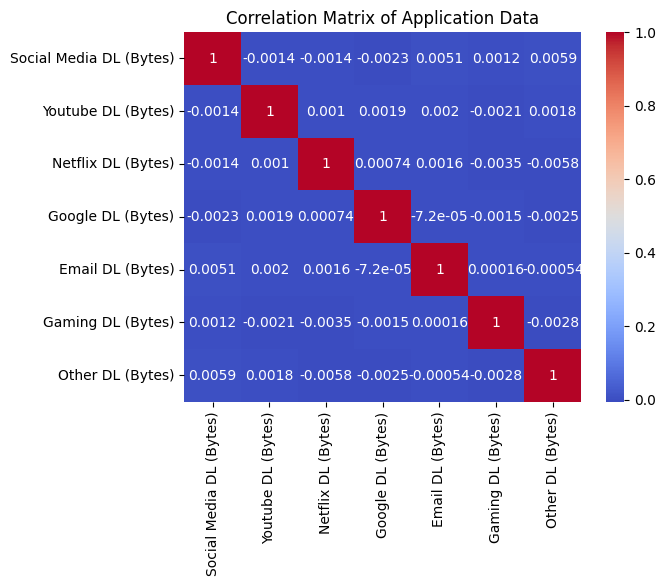

In [8]:
# Subset the data for relevant applications
app_columns = ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Compute correlation matrix
correlation_matrix = df_cleaned[app_columns].corr()

print(correlation_matrix)

# Optionally plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Application Data')
plt.show()


Explained variance by components: [0.14435283 0.143624  ]


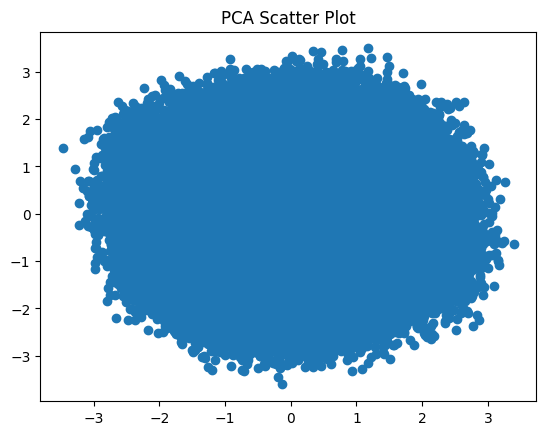

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the application data
scaler = StandardScaler()
app_data_scaled = scaler.fit_transform(df_cleaned[app_columns])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(app_data_scaled)

# Explained variance
print(f'Explained variance by components: {pca.explained_variance_ratio_}')

# PCA result interpretation
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Scatter Plot')
plt.show()
